# IFT 6758 - Devoir 3

### Pt 2. Classement d'éches
**Comparaison des groupes sur/sous-représentés**

Evaluation de ce notebook :

- Graphiques pour les distributions de scores et d'écarts
- Résultats imprimés des tests de permutation
- Réponses courtes (dernière section)


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [3]:
import chess_rating

/content/chess_rating.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## 1. Chargez les données

### 1.1 Lire les données XML

In [4]:
xml_path = Path("data/standard_oct22frl_xml.xml")  # shouldn't need to change this

In [5]:
# TODO: Complétez cette méthode dans chess_ratings.py
raw_df = chess_rating.parse_xml(xml_path)

In [6]:
# Vérifiez pour voir un échantillon de 5 joueurs
random.seed(0)
raw_df.sample(5)

,name,rating,sex,birthday,country,flag,title
212686,"Mamyrazakov, Artur",1726,M,1988,KGZ,i,None
21158,"Arrieta Otero, German",1616,M,1975,ESP,None,None
382279,"Wang, Luomeng",1236,F,2012,HUN,w,None
9115,"Alas Sebastian, Yasmina",1720,F,2002,ESP,w,None
386865,"Wong, Yen-Hsiu Elliot",1572,M,2011,SGP,None,None


In [7]:
# Vérifiez pour voir les dtypes du dataframe brut
raw_df.dtypes

,0
name,object
rating,object
sex,object
birthday,object
country,object
flag,object
title,object


In [8]:
# Voir il y a combien de dates de naissance manquantes
raw_df.birthday.isnull().sum()

8477

### 1.2 Nettoyez les données

Nous voulons que les anniversaires (année de naissance) et le score (Elo) soient convertis en nombres entiers afin que nous puissions faire des opérations numériques/logiques avec eux (par exemple, moins que, plus grand que, etc.). Complétez la méthode `clean_data()` dans `chess_rating.py`

In [9]:
# TODO: Complétez cette méthode dans chess_ratings.py
df = chess_rating.clean_data(raw_df, 2002)

/content/chess_rating.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(int)
/content/chess_rating.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birthday'] = df['birthday'].astype(int)


In [10]:
np.random.seed(0)
df.sample(5)

,name,rating,sex,birthday,country,flag,title
206801,"Lutzen, Mads",1542,M,2000,DEN,i,None
296314,"Rieckers, Dirk",1397,M,1964,GER,i,None
120235,"Gil, Celsio",1752,M,1999,STP,i,None
147860,"Hurwitz, Ed J G",2023,M,1964,ENG,i,None
124743,"Gonzalez Gomez, Pedro Daniel",1539,M,1997,ESP,None,None


In [11]:
df.dtypes

,0
name,object
rating,int64
sex,object
birthday,int64
country,object
flag,object
title,object


In [12]:
df.birthday.isnull().sum()

0

## 2. Histogrammes des scores Elo

Nous voulons d'abord comparer la distribution des scores pour les joueurs masculins et féminins.
Étant donné que les données sont assez fines, nous devrons regrouper les notes.
Complétez `bin_counts()`, qui devrait gérer le binning pour les données arbitraires et le choix des bacs.
En plus de renvoyer les décomptes bruts, renvoyez également les décomptes normalisés dans la trame de données (`"count_norm"`).

### 2.1 Binning data

Voici quelques entrées de test pour vous aider à valider votre implémentation :

In [13]:
# sample inputs to help test your method
x = pd.DataFrame({'rating': [1, 2, 4, 6, 6, 7, 8, 11] })
bins = [0, 5, 10, 15]
bin_centers = [2.5, 7.5, 12.5]

# Output attendu
solution = pd.DataFrame({
    'rating': {0: 7.5, 1: 2.5, 2: 12.5},
     'count': {0: 4, 1: 3, 2: 1},
     'count_norm': {0: 0.5, 1: 0.375, 2: 0.125}
})

In [14]:
binned_output = chess_rating.bin_counts(x, bins, bin_centers)
binned_output

,rating,count,count_norm
0,7.5,4,0.500
1,2.5,3,0.375
2,12.5,1,0.125


In [15]:
solution.eq(binned_output)

,rating,count,count_norm
0,True,True,True
1,True,True,True
2,True,True,True


Utilisons cette méthode pour bin les scores M/F et les comparer.

In [16]:
# TODO: Spécifiez les bin counts
bins = np.arange(1000, 2950, 50)  # Creates bins from 1000 to 2900 with a width of 50
bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate bin centers

In [17]:
# Générez les données d'histogramme
# TODO: completez chess_rating.bin_counts()
M_hist = chess_rating.bin_counts(df.query("sex=='M'"), bins=bins, bin_centers=bin_centers)
F_hist = chess_rating.bin_counts(df.query("sex=='F'"), bins=bins, bin_centers=bin_centers)

M_hist['sex'] = 'M'
F_hist['sex'] = 'F'

hist = pd.concat([M_hist, F_hist])

/content/chess_rating.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df['rating'], bins=bins, labels=bin_centers, right=False)
/content/chess_rating.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df['rating'], bins=bins, labels=bin_centers, right=False)


À l'aide des données regroupées, tracez deux graphiques linéaires des données regroupées côte à côte; l'un contenant les décomptes bruts (`"count"`), et l'autre contenant les décomptes normalisés (`"count_norm"`), et M/F doit être de deux couleurs différentes.

<Axes: xlabel='rating', ylabel='count_norm'>

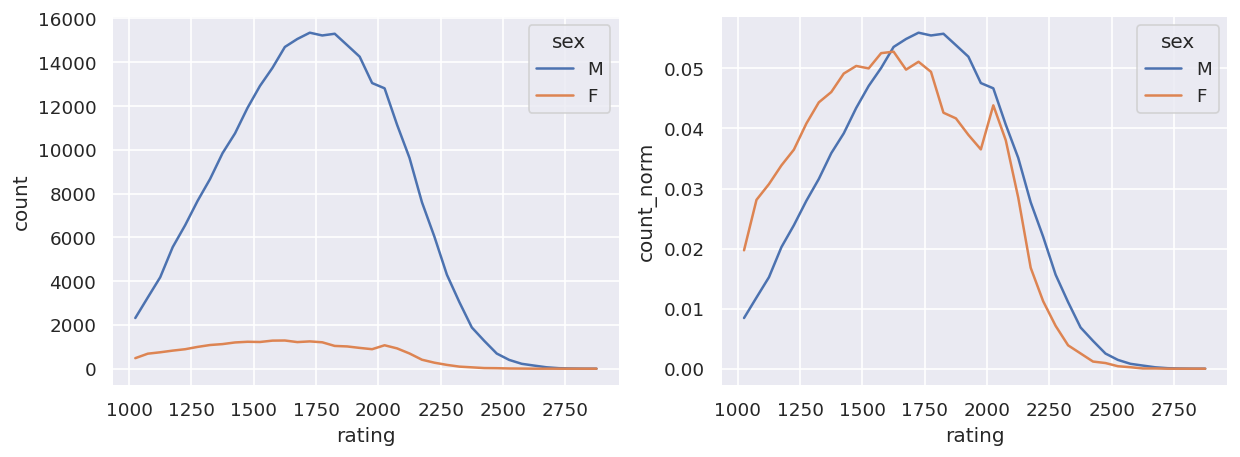

In [18]:
# Now draw the two histograms side-by-side.
fig, ax = plt.subplots(1,2, figsize=(12, 4), dpi=120)
sns.lineplot(data=hist, x="rating", y="count", hue='sex', ax=ax[0])
sns.lineplot(data=hist, x="rating", y="count_norm", hue='sex', ax=ax[1])

## 3. Tests de Permutation

Nous allons maintenant effectuer les tests de permutation comme indiqué dans l'expérience de pensée de l'introduction.
Prenez l'ensemble de données nettoyé complet (hommes et femmes) et échantillonnez au hasard deux groupes sans remplacement (c'est-à-dire mélangez les joueurs).
La taille des groupes doit refléter la différence du monde réel que nous souhaitons étudier, c'est-à-dire la taille du groupe masculin et féminin.
Terminez `chess_rating.PermutationTests.job()`, qui implémente la partie échantillonnage de cette expérience, et renvoie la valeur maximale des groupes surreprésentés et sous-représentés respectivement.

Ensuite, complétez la méthode `chess_rating.sample_two_groups()`, qui exécute cette expérience `n_iter` fois.
Une fois terminé, exécutez cette expérience dans le bloc-notes avec au moins `n_iter=1000`.
Exécutez la cellule qui imprime la différence moyenne obtenue à partir des tests de permutation, ainsi que les différences réelles.

In [20]:
n_overrep = df.query("sex=='M'").shape[0]
n_underrep = df.query("sex=='F'").shape[0]

over, under = chess_rating.sample_two_groups(df, n_overrep, n_underrep, n_iter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [21]:
diffs = over - under
max_M, max_F = df.query("sex=='M'").rating.max(), df.query("sex=='F'").rating.max()

In [22]:
print(f"Mean difference between top individuals in the over/under represented groups taken from the permutation experiments:")
print(f"\n\t{diffs.mean()} (std={diffs.std().round(2)})")
print()
print("Real values:\n")
print(f"\tMax M:\t\t{max_M}")
print(f"\tMax F:\t\t{max_F}")
print(f"\tReal difference: {max_M - max_F}")

Mean difference between top individuals in the over/under represented groups taken from the permutation experiments:

	85.983 (std=50.93)

Real values:

	Max M:		2856
	Max F:		2675
	Real difference: 181


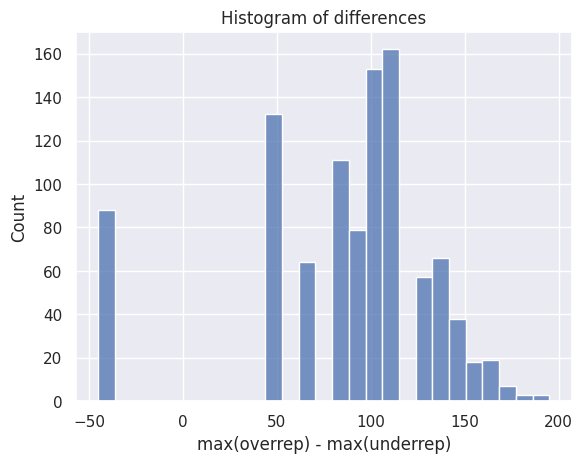

In [23]:
fig, ax = plt.subplots(1, 1, dpi=100)
sns.histplot(diffs, ax=ax).set(title="Histogram of differences", xlabel="max(overrep) - max(underrep)");

# Questions

Donnez des réponses courtes aux questions suivantes (1-3 lignes chaques).

1. Interprétez les résultats - pouvez-vous tirer une conclusion ? Rappelez-vous que l'affirmation discutée dans l'introduction de cette question était "les hommes sont meilleurs que les femmes aux échecs parce que la plupart des meilleurs joueurs sont des hommes". (Remarque : probablement une partie de votre réponse ici sera liée à votre réponse à la question suivante.)

    Les résultats montrent une différence notable dans la distribution des classements entre les hommes et les femmes, avec une concentration plus élevée des hommes aux classements supérieurs. Bien que cela semble confirmer que "la plupart des meilleurs joueurs sont des hommes", cela ne signifie pas nécessairement que les hommes sont intrinsèquement meilleurs. Cela pourrait être dû à d'autres facteurs, tels que la participation plus élevée des hommes.


2. Pensez-vous que les chiffres obtenus ici racontent toute l'histoire ? Quels pourraient être les problèmes avec l'analyse menée ici ? Les données avec lesquelles nous travaillons sont-elles biaisées d'une quelconque manière (autre qu'un biais de surreprésentation) ? L'ELO est-il une bonne mesure et peut-il être utilisé pour répondre à la question initiale ? Existe-t-il des différences dans le traitement social, culturel et systémique des hommes et des femmes qui peuvent empêcher le groupe sous-représenté d'obtenir des résultats similaires ? Rien d'autre?

    Les chiffres ne racontent pas toute l'histoire, car l'analyse est biaisée par la participation inégale des sexes et ne tient pas compte des facteurs sociaux, culturels et systémiques qui peuvent limiter la progression des femmes aux échecs. Le classement ELO, bien qu'utile, ne reflète pas ces influences extérieures.


Le but de ces questions est de souligner que les données sont une représentation limitée du monde réel. Il est essentiel pour nous, en tant que scientifiques des données, de prendre du recul lorsque nous examinons un résultat et de réfléchir à la façon dont il est lié au monde réel, plutôt que de simplement supposer naïvement que les données et la configuration expérimentale sont bonnes, ce qui entraîne souvent des conclusions erronées/incorrectes. Il pourrait y avoir plusieurs facteurs de causalité qui expliquent une relation qui sont indépendants de l'hypothèse d'origine: utilisation de données qui ne reflètent pas vraiment l'hypothèse que vous souhaitez tester, données biaisées (y compris les groupes surreprésentés), différences systémiques réelles entre les groupes, etc.